In [8]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Importing Dataset
df=pd.read_csv('narendramodi_tweets.csv')
df

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
5,8.263826e+17,659.0,0.0,2017-01-31 10:52:09,RT @PMOIndia: Financial inclusion for poverty ...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
6,8.263824e+17,498.0,0.0,2017-01-31 10:51:25,RT @RashtrapatiBhvn: The four-decade old deman...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
7,8.263823e+17,508.0,0.0,2017-01-31 10:51:18,RT @RashtrapatiBhvn: My Government has taken b...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
8,8.263823e+17,460.0,0.0,2017-01-31 10:51:08,"RT @RashtrapatiBhvn: Under its proactive ""Act ...",en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
9,8.263822e+17,389.0,0.0,2017-01-31 10:50:55,RT @RashtrapatiBhvn: Through Stand-up India in...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [10]:
# Subset the columns of review.text
text = df[['text']]
text.head(2)

,text
0,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...


In [11]:
# A very basic feature we can extract is the number of words is each review
text['count']=text['text'].apply(lambda x: len(str(x).split(" ")))
text.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,count
0,The President's address wonderfully encapsulat...,14
1,Rashtrapati Ji's address to both Houses of Par...,16


### Cleaning the data -Removing punctuation, number ,converting evrything to lower case

In [12]:
text['clean_text'] = text['text'].str.lower().str.replace('[^a-z ]','')
print(text['clean_text'][0])

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards transformingindia


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Removing the stop words
stop=set(stopwords.words('english'))
#if you want to extend the stopword list
#stop.extend('use','im')
stop.add('rt')
def sw(text):
    text=[word for word in text.split()if word not in stop]
    #joining the list of words with space separator
    return " ".join(text)
text['split_word']=text['clean_text'].apply(sw)
text.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,text,count,clean_text,split_word
0,The President's address wonderfully encapsulat...,14,the presidents address wonderfully encapsulate...,presidents address wonderfully encapsulated in...
1,Rashtrapati Ji's address to both Houses of Par...,16,rashtrapati jis address to both houses of parl...,rashtrapati jis address houses parliament inde...
2,RT @PMOIndia: Empowering the marginalised. htt...,6,rt pmoindia empowering the marginalised httpst...,pmoindia empowering marginalised httpstcowwsqgwdk
3,RT @PMOIndia: Commitment to welfare of farmers...,8,rt pmoindia commitment to welfare of farmers h...,pmoindia commitment welfare farmers httpstcopa...
4,RT @PMOIndia: Improving the quality of life fo...,11,rt pmoindia improving the quality of life for ...,pmoindia improving quality life poor httpstcou...


In [14]:
#create a count vectorizer object
count_vectorizer= CountVectorizer()

In [22]:
#fit the count vectorizer using the text data
count_vectorizer.fit(text["split_word"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
#Learn a vocabulary dictionary of all token in the raw document using fit on CV
dictionary=count_vectorizer.vocabulary_.items()
dictionary

dict_items([('presidents', 6530), ('address', 86), ('wonderfully', 8642), ('encapsulated', 1940), ('indias', 4674), ('strengths', 7727), ('aspirations', 416), ('potential', 6453), ('amp', 256), ('efforts', 1872), ('towards', 8113), ('transformingindia', 8146), ('rashtrapati', 6796), ('jis', 4951), ('houses', 2800), ('parliament', 6191), ('indepth', 4609), ('extensive', 2128), ('hear', 2685), ('httpstcordkqtjgnnx', 3891), ('rashtrapatibhvn', 6797), ('pmoindia', 6392), ('empowering', 1933), ('marginalised', 5502), ('httpstcowwsqgwdk', 4260), ('commitment', 1170), ('welfare', 8584), ('farmers', 2170), ('httpstcopaafrfmrc', 3777), ('improving', 4564), ('quality', 6677), ('life', 5276), ('poor', 6422), ('httpstcougmvkz', 4097), ('financial', 2245), ('inclusion', 4585), ('poverty', 6456), ('alleviation', 214), ('httpstcoxtzyhhte', 4322), ('fourdecade', 2339), ('old', 6065), ('demand', 1535), ('onerankonepension', 6076), ('orop', 6122), ('armed', 364), ('forces', 2307), ('veterans', 8436), ('

In [24]:
#learn a vocabulary dictionary and rutrn term-document matrix fit_transform
#creating DTM
x=count_vectorizer.fit_transform(text['split_word'])
x

<3220x8761 sparse matrix of type '<class 'numpy.int64'>'
	with 32920 stored elements in Compressed Sparse Row format>

In [28]:
## visualise the element of sparse matrix by conveerting it to an array

DTM = pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names())
DTM.head(2)

,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawas,aazadisaal,abdel,...,zaidi,zayed,zeal,zero,zhejiang,ziara,zimbabwe,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
### Get the word and its respective frequency for the whole document
DTM.sum().head()

aabhar       1
aadhaar      6
aadhar       1
aajtak       1
aamirkhan    1
dtype: int64

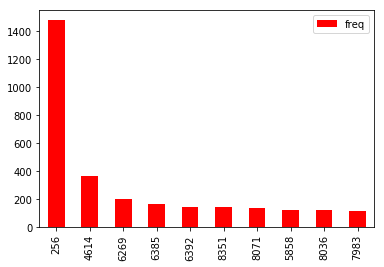

In [34]:
word_count_freq=DTM.sum()
word_table=pd.DataFrame(word_count_freq).reset_index()
word_table=word_table.rename(columns={'index':'word',0:'freq'})
word_table.sort_values(by='freq',ascending = False).head(10).plot.bar(color='red')

## Bivariate analysis - Categorial columns vs numerical columns
#### Anova - an anova test is the way to find out if an experiment result is significant ot not in other words,it help you to fig out if you need to reject the null hypo or accept the alternative hypo

In [35]:
#we will use the ind=build data set from pydataset
from pydataset import data
df=data('chickwts')
df.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [36]:
df.shape

(71, 2)

In [37]:
## exact unique values of a part col
df['feed'].unique()

array(['horsebean', 'linseed', 'soybean', 'sunflower', 'meatmeal',
       'casein'], dtype=object)

In [38]:
## no o9f unnique levels in a parti col
df['feed'].nunique()

6

In [39]:
#lets check the  sample size of each feed
x=df.groupby(['feed']).size().reset_index()
x

,feed,0
0,casein,12
1,horsebean,10
2,linseed,12
3,meatmeal,11
4,soybean,14
5,sunflower,12


In [40]:
#sample size seems having almost equal sample sizes
#lets also check the mean weight of each feed
df.groupby(['feed'])['weight'].mean().reset_index()

,feed,weight
0,casein,323.583333
1,horsebean,160.200000
2,linseed,218.750000
3,meatmeal,276.909091
4,soybean,246.428571
5,sunflower,328.916667


In [44]:
#lets creat a null and alternate hypothesis
#ho:= feed has no impact on weight
#h1=feed does impact on weight
#input to the annova fuction is the pandas series of differnet sample
# Lets create pandas series for each group by following below steps
# step 1: Creatig pandas series of weight for each group
casein = df['weight'][df['feed'] == 'casein']
horsebean = df['weight'][df['feed']== 'horsebean']
linseed = df['weight'][df['feed'] == 'linseed']
meatmeal = df['weight'][df['feed'] == 'meatmeal']
soybean=df['weight'][df['feed'] == 'soybean']
sunflower=df['weight'][df['feed'] == 'sunflower']

In [45]:
#perform ANOVA 
import scipy.stats as stats
stats.f_oneway(casein,horsebean,linseed,meatmeal,soybean,sunflower)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

## As the P-value is less then alpha we can reject our null hyppthesis which means that feed have impact on weight

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [60]:
# manual process for annova
meanofmean=(np.mean(casein)+np.mean(horsebean)+np.mean(linseed)+np.mean(meatmeal)+np.mean(soybean)+np.mean(sunflower))
meanofmean/6

259.13127705627704

In [65]:
c,h,l,m,s,ss = np.mean(casein),np.mean(horsebean),np.mean(linseed),np.mean(meatmeal),np.mean(soybean),np.mean(sunflower)
c,h,l,m,s,ss

(323.5833333333333,
 160.2,
 218.75,
 276.90909090909093,
 246.42857142857142,
 328.9166666666667)

In [70]:
ssw=((((df['weight'][df['feed'] == 'casein'])-323.58)**2).sum() 
+(((df['weight'][df['feed'] == 'horsebean'])-160.2)**2).sum()
+(((df['weight'][df['feed'] == 'linseed'])-218.75)**2).sum() 
+ (((df['weight'][df['feed'] == 'meatmeal'])-276.909)**2).sum()
+ (((df['weight'][df['feed'] == 'soybean'])-246.428)**2).sum()
+ (((df['weight'][df['feed'] == 'sunflower'])-328.916)**2).sum())
ssw

195556.021139

In [72]:
sst=(df['weight']-261.301)**2
sst.sum()

426685.18867099995

In [ ]:
ssb=

In [57]:
model_name = ols('outcome_variable ~ casein + horsebean + linseed + meatmeal + soybean + sunflower, data=df)

SyntaxError: EOL while scanning string literal (<ipython-input-57-8dd8c069b193>, line 1)

In [ ]:
outcome_v

In [52]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

NameError: name 'aov_table' is not defined